# Spam/Ham Detector System

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading Data
data = pd.read_table("SMSSpamCollection", sep="\t", header=None, names=["label", "messages"])
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Explore the data
def explore_data(df):
    """
    Exploring the data
    """
    print("Data shape: ", df.shape)
    print("================================================")
    print("Missing values: ", df.isnull().sum().sum())
    print("================================================")
    print("Information abour the data: ", df.info())
    print("================================================")
    print("Describing the data: ", df.describe())
    

explore_data(data)

Data shape:  (5572, 2)
Missing values:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Information abour the data:  None
Describing the data:         label                messages
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


## Exploratory Data Analysis

Total number of Ham Cases:  4825
Total number of Spam Cases:  747


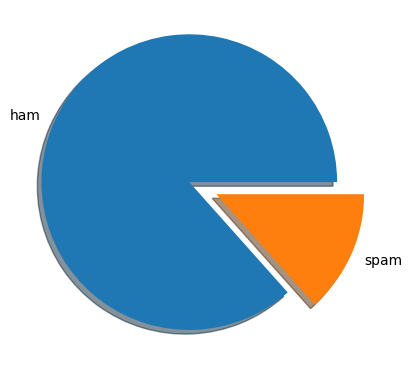

In [5]:
# The distribution of classes
len_ham = len(data['label'][data.label == 'ham'])
len_spam = len(data['label'][data.label == 'spam'])

arr = np.array([len_ham, len_spam])
labels = ['ham', 'spam']

print("Total number of Ham Cases: ", len_ham)
print("Total number of Spam Cases: ", len_spam)

plt.pie(arr, labels=labels, explode=[0.2,0.0], shadow=True)
plt.show()

The classes are imbalanced.

## Text Preprocessing

In [7]:
def text_preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("’", "'")\
            .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
            .replace("n't", "not").replace("what's", " what is").replace("it's", "it is")\
            .replace("'ve", "have").replace("i'm", " i am").replace("'re", "are")\
            .replace("he's", "he is").replace("she's", "she is").replace("'s", "own")\
            .replace("%", "percent").replace("₹", "rupee").replace("$", "dollar")\
            .replace("€", "euro").replace("'ll", "will")
        
    return x


data["Preprocessed Text"] = data["messages"].apply(lambda x: text_preprocess(x))
data.head()

,label,messages,Preprocessed Text
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i donot think he goes to usf, he lives aro..."


In [9]:
print(data["messages"][1000])
print(data["Preprocessed Text"][1000])

Aight will do, thanks again for comin out
aight will do, thanks again for comin out


## Feature Engineering

In [10]:
data["label"] = data.label.map({"ham": 0, "spam": 1})

In [11]:
data.sample(5)

,label,messages,Preprocessed Text
4526,0,Cos i was out shopping wif darren jus now n i ...,cos i was out shopping wif darren jus now n i ...
316,0,K.k:)advance happy pongal.,k.k:)advance happy pongal.
1125,0,Aiyar sorry lor forgot 2 tell u...,aiyar sorry lor forgot 2 tell u...
4606,0,"I need an 8th but I'm off campus atm, could I ...","i need an 8th but i am off campus atm, could ..."
4570,0,At WHAT TIME should i come tomorrow,at what time should i come tomorrow


## Data Splitting

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data["Preprocessed Text"], data["label"], random_state=1)

### (i) Vectorizing Text

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()

# Fit the training data and return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix
testing_data = count_vector.transform(X_test)

## Model Building

In [16]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [17]:
preds = naive_bayes.predict(testing_data)
preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
from sklearn.metrics import classification_report

print("Naive Bayes Classification Report\n", classification_report(y_test, preds))

Naive Bayes Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1208
           1       0.97      0.94      0.95       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



### (i) Predict a single instance

In [22]:
text = pd.Series("I've been trying to call you all day...")
test = count_vector.transform(text)

In [23]:
naive_bayes.predict(test)

array([0], dtype=int64)